In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()

In [6]:
# reflect an existing database into a new model
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
m = Base.classes.measurement
s = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Display the measurement table data in dictionary format
m_first_row = session.query(m).first()
m_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1fbeee55520>,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1}

In [11]:
# Display the station table data in dictionary format
s_first_row = session.query(s).first()
s_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1fbeee55c10>,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716}

In [12]:
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(m.date).\
    order_by(m.date.desc()).first()
print({last_date})

{('2017-08-23',)}


In [13]:
# Design a query to retrieve the last 12 months of precipitation data
# Sort the dataframe by date
last_year_prcp = session.query(m.date, m.prcp).\
    filter(m.date >= '2016-08-23').\
    order_by(m.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_prcp_df = pd.DataFrame(last_year_prcp, columns=['date','precipitation'])
last_year_prcp_df.set_index('date')
last_year_prcp_df.dropna()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


Text(0, 0.5, 'Precipitation')

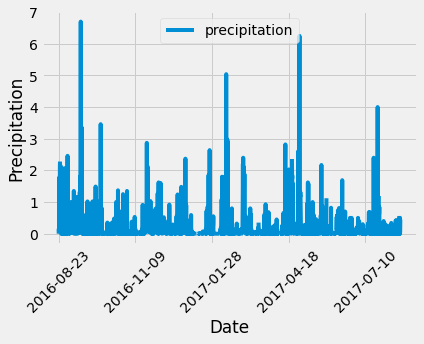

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
last_year_prcp_df.plot(x='date',y='precipitation', rot=45)
plt.xlabel('Date')
plt.ylabel('Precipitation')

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_prcp_df['precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

In [16]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(func.count(s.id)).all()
station_count

[(9)]

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(m.station, func.count(m.station)).\
    group_by(m.station).\
    order_by(func.count(m.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [m.station,
      func.min(m.tobs),
      func.max(m.tobs),
      func.avg(m.tobs)]
most_active = session.query(*sel).\
    filter(m.station == 'USC00519281')
most_active.all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, '')

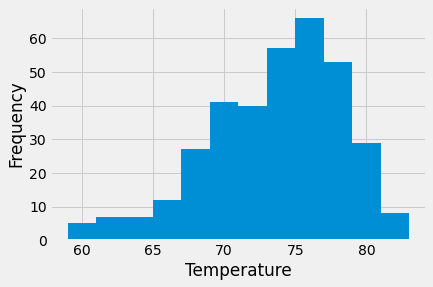

In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_obs = session.query(m.date, m.tobs).\
    filter(m.station == 'USC00519281').\
    filter(m.date >= '2016-08-23').\
    order_by(m.date).all()
most_obs_df = pd.DataFrame(most_obs, columns=['date','tobs'])
most_obs_df.set_index('date')
most_obs_df.hist(bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.title('')